<a href="https://colab.research.google.com/github/TatianePadilhaS/TatianePS/blob/main/exerc%C3%ADcios_24_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1

1- Determine os valores da vazão e da concentração de sal na saída?
2- Quais os novos valores quando a vazão da corrente A diminuir em 50% e sua concentração de sal aumnetar em 50%?

Corrente A: 100 kg/h de solução com 10% de sal
Corrente B: 50 kg/h de solução com 30% de sal

Balanço global:
A + B = F --> F = 150 kg/h

Balanço por componente:
xA + xB = xF --> x = 0,166

In [ ]:
# Criando a função

correnteA = 100
correntB = 50
C_salA = 0.1
C_salB = 0.3

def balanco(correnteA, correntB, C_salA, C_salB):
  try:
    if not isinstance(correnteA, (int, float)):
      raise ValueError("A corrente A deve ser um número.")

    if not isinstance(correntB, (int, float)):
      raise ValueError("A corrente B deve ser um número.")

    if correnteA < 0 or correntB < 0:
      raise ValueError("A corrente não pode ser negativa.")

    if not isinstance(C_salA, (int, float)):
      raise ValueError("A concentração de sal A deve ser um número.")

    if not isinstance(C_salB, (int, float)):
      raise ValueError("A concentração de sal B deve ser um número.")
    if C_salA < 0 or C_salB < 0:
      raise ValueError("A concentração de sal não pode ser negativa.")

    vazao = correnteA + correntB
    print(f"A vazão é: {vazao}")
    x = ((C_salA * correnteA) + (C_salB * correntB)) / vazao
    print(f"A concentração de sal é: {x}")

    return vazao, x

  except ValueError as e:
    print(f"Erro: {e}")

  return None, None

balanco(correnteA, correntB, C_salA, C_salB)

A vazão é: 150
A concentração de sal é: 0.16666666666666666


(150, 0.16666666666666666)

# Questão 2

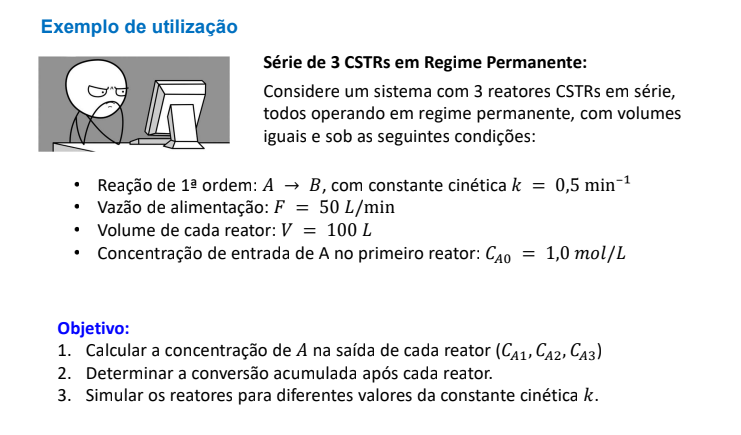

In [ ]:
def concentracao_cstr(C_entrada, constante_cinetica, volume, vazao):
    """Calcula a concentração de saída de um CSTR."""
    return C_entrada / (1 + constante_cinetica * volume / vazao)

def conversao(C_inicial, C_atual):
    """Calcula a conversão a partir da concentração inicial."""
    return (C_inicial - C_atual) / C_inicial

# Dados iniciais
valores_k = [0.5]
vazao = 50         # L/min
volume = 100       # L
C_inicial = 1.0    # mol/L

for k in valores_k:
    print(f"\nSimulação para k = {k} min⁻¹:")

    CA1 = concentracao_cstr(C_inicial, k, volume, vazao)
    CA2 = concentracao_cstr(CA1, k, volume, vazao)
    CA3 = concentracao_cstr(CA2, k, volume, vazao)

    X1 = conversao(C_inicial, CA1)
    X2 = conversao(C_inicial, CA2)
    X3 = conversao(C_inicial, CA3)

    print(f"CA1 = {CA1:.4f} mol/L, Conversão após reator 1 = {X1:.2%}")
    print(f"CA2 = {CA2:.4f} mol/L, Conversão após reator 2 = {X2:.2%}")
    print(f"CA3 = {CA3:.4f} mol/L, Conversão após reator 3 = {X3:.2%}")


Simulação para k = 0.5 min⁻¹:
CA1 = 0.5000 mol/L, Conversão após reator 1 = 50.00%
CA2 = 0.2500 mol/L, Conversão após reator 2 = 75.00%
CA3 = 0.1250 mol/L, Conversão após reator 3 = 87.50%


In [ ]:
def concentracao_cstr(C_entrada, constante_cinetica, volume, vazao):
    """Calcula a concentração de saída de um CSTR com tratamento de erro."""
    try:
        # Validações
        if not isinstance(C_entrada, (int, float)):
            raise ValueError("A concentração de entrada deve ser um número.")
        if not isinstance(constante_cinetica, (int, float)):
            raise ValueError("A constante cinética deve ser um número.")
        if not isinstance(volume, (int, float)):
            raise ValueError("O volume do reator deve ser um número.")
        if not isinstance(vazao, (int, float)):
            raise ValueError("A vazão deve ser um número.")

        if C_entrada < 0 or constante_cinetica < 0 or volume <= 0 or vazao <= 0:
            raise ValueError("Os valores devem ser positivos e o volume e vazão maiores que zero.")

        return C_entrada / (1 + constante_cinetica * volume / vazao)

    except ValueError as erro:
        print(f"Erro no cálculo da concentração: {erro}")
        return None

def conversao(C_inicial, C_atual):
    """Calcula a conversão com tratamento de erro."""
    try:
        if not isinstance(C_inicial, (int, float)) or not isinstance(C_atual, (int, float)):
            raise ValueError("As concentrações devem ser números.")
        if C_inicial <= 0:
            raise ValueError("A concentração inicial deve ser maior que zero.")
        if C_atual < 0:
            raise ValueError("A concentração atual não pode ser negativa.")

        return (C_inicial - C_atual) / C_inicial

    except ValueError as erro:
        print(f"Erro no cálculo da conversão: {erro}")
        return None

# ==== Entrada de dados ====
valores_k = [0.5]  # Você pode adicionar mais valores aqui, como [0.2, 0.5, 1.0]
vazao = 50         # L/min
volume = 100       # L
C_inicial = 1.0    # mol/L

# ==== Simulação ====
for k in valores_k:
    print(f"\nSimulação para k = {k} min⁻¹:")

    CA1 = concentracao_cstr(C_inicial, k, volume, vazao)
    if CA1 is None:
        break

    CA2 = concentracao_cstr(CA1, k, volume, vazao)
    if CA2 is None:
        break

    CA3 = concentracao_cstr(CA2, k, volume, vazao)
    if CA3 is None:
        break

    X1 = conversao(C_inicial, CA1)
    X2 = conversao(C_inicial, CA2)
    X3 = conversao(C_inicial, CA3)

    print(f"CA1 = {CA1:.4f} mol/L, Conversão após reator 1 = {X1:.2%}")
    print(f"CA2 = {CA2:.4f} mol/L, Conversão após reator 2 = {X2:.2%}")
    print(f"CA3 = {CA3:.4f} mol/L, Conversão após reator 3 = {X3:.2%}")


Simulação para k = 0.5 min⁻¹:
CA1 = 0.5000 mol/L, Conversão após reator 1 = 50.00%
CA2 = 0.2500 mol/L, Conversão após reator 2 = 75.00%
CA3 = 0.1250 mol/L, Conversão após reator 3 = 87.50%
